#Mount Drive, Auto-reload setup

In [ ]:
# !pip install -q transformers datasets huggingface_hub evaluate sentencepiece scikit-learn imbalanced-learn accelerate torch pandas matplotlib

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.1/84.1 kB 4.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 45.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 61.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 28.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 7.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 15.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 10.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 7.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 51.0 MB/s eta 0:00:00


In [1]:
import os
os.environ["WANDB_DISABLED"] = "true"
os.environ["WANDB_MODE"] = "offline"
os.environ["WANDB_SILENT"] = "true"

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
import os

GOOGLE_DRIVE_PATH = os.path.join('/content', 'drive', 'My Drive', 'ColabNotebooks', 'DL','Deep Learning Project Full','DL Team Project', 'DL Team Project - Code, Files, Structure')
print(os.listdir(GOOGLE_DRIVE_PATH))

['KP DL Project Colab Notebook.ipynb', 'configs', 'data', 'Obsolete - models', 'outputs', '__pycache__', 'src', 'environment.yml', 'Archive or Obsolete']


In [5]:
import sys

sys.path.append(GOOGLE_DRIVE_PATH)

In [6]:
# if running locally set GOOGLE PATH
import sys
if 'google.colab' in sys.modules:
  print(f'Running in google colab. Our path is `{GOOGLE_DRIVE_PATH}`')
else:
  GOOGLE_DRIVE_PATH = '.'
  print('Running locally.')

Running in google colab. Our path is `/content/drive/My Drive/ColabNotebooks/DL/Deep Learning Project Full/DL Team Project/DL Team Project - Code, Files, Structure`


In [7]:
print("Current working directory:", os.getcwd())

Current working directory: /content


In [8]:
# ch dir to project folder
os.chdir(GOOGLE_DRIVE_PATH)

In [9]:
print("Current working directory:", os.getcwd())

Current working directory: /content/drive/My Drive/ColabNotebooks/DL/Deep Learning Project Full/DL Team Project/DL Team Project - Code, Files, Structure


In [10]:
import imp

In [11]:
%load_ext autoreload
# %reload_ext autoreload
%autoreload 2

In [12]:
!pip install -q --upgrade transformers datasets huggingface_hub

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.0/44.0 kB 3.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.0/12.0 MB 89.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 511.6/511.6 kB 36.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 566.1/566.1 kB 42.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.7/47.7 MB 27.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.3/3.3 MB 70.8 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
cudf-cu12 25.2.1 requires pyarrow<20.0.0a0,>=14.0.0; platform_machine == "x86_64", but you have pyarrow 22.0.0 which is incompatible.
pylibcudf-cu12 25.2.1 requires pyarrow<20.0.0a0,>=14.0.0; platform_machine == "x86_64", but you have pyarrow 22.0.0 which is incompatible.


#Model 2 - BERT

##Model 2 - BERT Basic Training

In [ ]:
# Cell 1: Quick training run (few epochs) to test pipeline

import os
from datetime import datetime
from src.model_BERT import run_training_pipeline
from configs.config import MODEL_CONFIGS


# Quick debug settings
repo_id = "McAuley-Lab/Amazon-Reviews-2023"
chosen_jsonl = "raw/review_categories/All_Beauty.jsonl"

# Use 'bert' config from configs/config.py. This will use distilbert-base-uncased by default.
model_key = "bert"

# For fast debug use small subset and few epochs
debug_overrides = {
    "num_train_epochs": 4,      # use less epochs for quick test
    "train_batch_size": 16,
    "eval_batch_size": 32,
    "learning_rate": 2e-5,
    "max_length": 128
}

# run training pipeline (subsample to 2000 train rows to be very quick; set subset_sample=None to use oversampled full train)
res = run_training_pipeline(
    repo_id=repo_id,
    chosen_jsonl=chosen_jsonl,
    model_key=model_key,
    subset_sample=2000,           # small subset for quick debug
    config_overrides=debug_overrides
)

print("Quick run complete. Run outputs saved at:")
print(res["run_outdir"])
print("Train seconds (approx):", res["train_seconds"])
print("Eval metrics summary:")
print(res["eval"]["metrics"])


Downloaded to: /root/.cache/huggingface/hub/datasets--McAuley-Lab--Amazon-Reviews-2023/snapshots/2b6d039ed471f2ba5fd2acb718bf33b0a7e5598e/raw/review_categories/All_Beauty.jsonl
Loaded dataset rows: 701528
Columns: ['rating', 'title', 'text', 'images', 'asin', 'parent_asin', 'user_id', 'timestamp', 'helpful_vote', 'verified_purchase']
After preprocess sample: {'rating': 5.0, 'text': "Such a lovely scent but not overpowering. — This spray is really nice. It smells really good, goes on really fine, and does the trick. I will say it feels like you need a lot of it though to get the texture I want. I have a lot of hair, medium thickness. I am comparing to other brands with yucky chemicals so I'm gonna stick with this. Try it!", 'label3': 2, 'label5': 4}
Num rows after filter: 701528
Sizes: 561229 70146 70153
Before oversample class counts:
 label3
2    400090
0    116093
1     45046
Name: count, dtype: int64
After oversample class counts:
 label3
2    400090
0    400090
1    400090
Name: co

Map:   0%|          | 0/2000 [00:00<?, ? examples/s]

Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
Using the `WANDB_DISABLED` environment variable is deprecated and will be removed in v5. Use the --report_to flag to control the integrations used for logging result (for instance --report_to none).
/content/drive/My Drive/ColabNotebooks/DL/Deep Learning Project Full/DL Team Project - Code, Files, Structure/src/model_BERT.py:175: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  model=model,


Run outputs will be saved in: outputs/distilbert-base-uncased_lr2e-05_bs16_ep3_20251126_051700
Starting training...


Epoch,Training Loss,Validation Loss,Accuracy,Precision Macro,Recall Macro,F1 Macro
1,0.632200,0.368115,0.867605,0.543181,0.620422,0.577324
2,0.342200,0.333143,0.877256,0.698109,0.674472,0.669831
3,0.265100,0.328265,0.881718,0.718119,0.688453,0.696239


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Training done, seconds: 235.79566604799993
Running evaluation on test set...


Eval metrics: {'accuracy': 0.8825994611777116, 'precision': 0.867194342698656, 'recall': 0.8825994611777116, 'f1': 0.8727941689364712, 'precision_per_class': [0.8040916742198627, 0.41858353510895885, 0.9360154076610314], 'recall_per_class': [0.855902418854662, 0.2456046883324454, 0.9620683449641079], 'f1_per_class': [0.8291885035217145, 0.3095691102406267, 0.948863076103891], 'support_per_class': [14511, 5631, 50011], 'confusion_matrix': [[12420, 956, 1135], [2094, 1383, 2154], [932, 965, 48114]]}
Saved model & tokenizer to: outputs/distilbert-base-uncased_lr2e-05_bs16_ep3_20251126_051700
Appended results to outputs/team_comparison_results.csv
Quick run complete. Run outputs saved at:
outputs/distilbert-base-uncased_lr2e-05_bs16_ep3_20251126_051700
Train seconds (approx): 235.79566604799993
Eval metrics summary:
{'accuracy': 0.8825994611777116, 'precision': 0.867194342698656, 'recall': 0.8825994611777116, 'f1': 0.8727941689364712, 'precision_per_class': [0.8040916742198627, 0.418583535

##Model 2 - BERT Evaluate Basic Model Results

Using run folder: outputs/distilbert-base-uncased_lr2e-05_bs16_ep3_20251126_051700
Candidate log files (first few): ['outputs/distilbert-base-uncased_lr2e-05_bs16_ep3_20251126_051700/config.json', 'outputs/distilbert-base-uncased_lr2e-05_bs16_ep3_20251126_051700/tokenizer_config.json', 'outputs/distilbert-base-uncased_lr2e-05_bs16_ep3_20251126_051700/special_tokens_map.json', 'outputs/distilbert-base-uncased_lr2e-05_bs16_ep3_20251126_051700/tokenizer.json', 'outputs/distilbert-base-uncased_lr2e-05_bs16_ep3_20251126_051700/checkpoint-125/config.json']


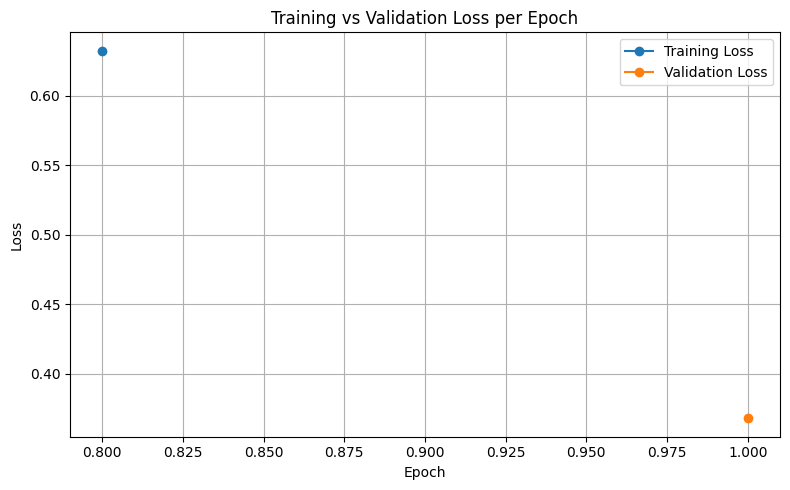

Saved loss curve to: outputs/distilbert-base-uncased_lr2e-05_bs16_ep3_20251126_051700/loss_curve.png
Loaded model & tokenizer from run folder.
No in-session test_tok found. Skipping re-evaluation prediction step to avoid re-downloading dataset.


In [ ]:
# Cell 2: Evaluation, plot curves, save outputs & artifacts
# This cell reads the run folder produced by Cell 1 and produces:
# - training/validation loss plot (if trainer logs saved inside run folder)
# - evaluation detailed report, confusion matrix
# - saves figures into the same run_outdir for later retrieval

import os
import json
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

# Provide the run_outdir from the previous cell (or paste it here)
run_outdir = res["run_outdir"]  # if you ran Cell 1 in same session
print("Using run folder:", run_outdir)

# 1) Trainer saved the models and likely logs in run_outdir; search for trainer_state.json or training_args.bin or logs
# If the Trainer logs are not in the run folder, we can still load saved model and run prediction on test set using the saved tokenizer/model.
# We'll try to locate a trainer_state.json or trainer_state.pth or logs in run_outdir or HF default outputs.

# Try to load a Trainer state logs file (common files: trainer_state.json or runs/*.json)
possible_logs = []
for root, dirs, files in os.walk(run_outdir):
    for f in files:
        if f.lower().startswith("trainer_state") or f.lower().endswith(".json") or f.lower().endswith(".log"):
            possible_logs.append(os.path.join(root, f))

print("Candidate log files (first few):", possible_logs[:5])

# If logs exist (trainer_state.*), parse and plot training vs eval loss (best-effort)
def try_plot_logs(log_paths, save_folder):
    for p in log_paths:
        try:
            with open(p, "r", encoding="utf-8") as fh:
                txt = fh.read()
            # Try parse as JSON
            try:
                obj = json.loads(txt)
                # If trainer_state style dict with "log_history" key
                if isinstance(obj, dict) and "log_history" in obj:
                    logs = obj["log_history"]
                else:
                    # else if it's a list of events, try to extract epoch/loss/eval_loss keys
                    logs = obj if isinstance(obj, list) else []
            except:
                # fallback: try to parse lines with JSON per-line
                logs = []
                for ln in txt.splitlines():
                    ln = ln.strip()
                    if not ln:
                        continue
                    try:
                        j = json.loads(ln)
                        logs.append(j)
                    except:
                        continue

            # turn logs into simple lists and plot
            epochs = []
            train_losses = []
            eval_losses = []
            for e in logs:
                if "epoch" in e and "loss" in e:
                    epochs.append(e["epoch"])
                    train_losses.append(e["loss"])
                if "epoch" in e and "eval_loss" in e:
                    # attempt to align by epoch when plotting
                    eval_losses.append((e["epoch"], e["eval_loss"]))

            if train_losses:
                # produce training loss per epoch (aggregate last per epoch)
                import pandas as pd
                df_train = pd.DataFrame([x for x in logs if x.get("loss") is not None and x.get("epoch") is not None])
                train_by_epoch = df_train.sort_values(['epoch', 'step'] if 'step' in df_train.columns else ['epoch']).groupby('epoch', as_index=False).last()
                train_epochs = train_by_epoch['epoch'].values
                train_loss = train_by_epoch['loss'].astype(float).values

                # eval_by_epoch
                df_val = pd.DataFrame([x for x in logs if x.get("eval_loss") is not None and x.get("epoch") is not None])
                if not df_val.empty:
                    val_by_epoch = df_val.sort_values('epoch').drop_duplicates(subset=['epoch'], keep='last')
                    val_epochs = val_by_epoch['epoch'].values
                    val_loss = val_by_epoch['eval_loss'].astype(float).values
                else:
                    val_epochs = []
                    val_loss = []

                # Plot
                plt.figure(figsize=(8,5))
                plt.plot(train_epochs, train_loss, marker='o', label='Training Loss')
                if len(val_epochs)>0:
                    plt.plot(val_epochs, val_loss, marker='o', label='Validation Loss')
                plt.xlabel('Epoch'); plt.ylabel('Loss'); plt.title('Training vs Validation Loss per Epoch')
                plt.legend(); plt.grid(True)
                plt.tight_layout()
                save_path = os.path.join(save_folder, "loss_curve.png")
                plt.savefig(save_path)
                plt.show()
                print("Saved loss curve to:", save_path)
                return True
        except Exception as e:
            print("Log parse error for", p, ":", e)
    return False

os.makedirs(run_outdir, exist_ok=True)
plotted = try_plot_logs(possible_logs, run_outdir)
if not plotted:
    print("Could not find or parse trainer logs automatically. If you have the trainer object in the session, plot using trainer.state.log_history.")

# 2) Load saved model & tokenizer if you want to run predictions again and save classification report & confusion matrix.
from transformers import AutoTokenizer, AutoModelForSequenceClassification, TextClassificationPipeline, pipeline

try:
    tokenizer = AutoTokenizer.from_pretrained(run_outdir)
    model = AutoModelForSequenceClassification.from_pretrained(run_outdir)
    print("Loaded model & tokenizer from run folder.")
except Exception as e:
    print("Unable to load model/tokenizer from run folder:", e)
    tokenizer, model = None, None

# If model loaded, and you still have test_tok in memory (if you ran the trainer earlier in same session),
# you can create pipeline and predict; otherwise re-create test dataset using the same dataset load steps.
# We'll attempt prediction if model exists and test_tok variable exists in session.

if model is not None:
    try:
        # If test_tok available from run session (the run_training_pipeline returns eval dict but not dataset), try to use it
        # For robustness, we attempt to rebuild a small test set from HF using same JSONL. If you have test_tok in session, use that.
        from datasets import load_dataset
        # Try to use the original chosen JSONL path saved in run_outdir metadata (not guaranteed). As fallback skip rebuild.
        # Here we will not re-download dataset to avoid long download. If you have a local test dataset, load it and set `test_dataset`.
        test_dataset = None
        if 'test_tok' in globals():
            test_dataset = globals()['test_tok']
        if test_dataset is None:
            print("No in-session test_tok found. Skipping re-evaluation prediction step to avoid re-downloading dataset.")
        else:
            # Build pipeline and run predictions on test set
            pipe = pipeline("text-classification", model=model, tokenizer=tokenizer, device=0 if model.device.type=='cuda' else -1)
            # extract texts and labels
            df_test = test_dataset.to_pandas()
            texts = df_test['text'].astype(str).tolist()
            labels = df_test['labels'].values
            # predict in batches
            batch_size = 64
            preds = []
            for i in range(0, len(texts), batch_size):
                batch = texts[i:i+batch_size]
                out = pipe(batch, truncation=True, max_length=128)
                # pipeline returns label names; convert to ints if names are numeric or map
                # We will extract predicted label index by reading 'label' string if of form 'LABEL_X' or 'X'
                for o in out:
                    lab = o.get('label')
                    # try numeric extraction
                    try:
                        if isinstance(lab, str) and lab.startswith("LABEL_"):
                            preds.append(int(lab.split("_",1)[1]))
                        else:
                            preds.append(int(lab))
                    except:
                        # fallback: use score threshold with model logits? keep as -1
                        preds.append(-1)
            preds = np.array(preds)
            # Save classification report & confusion matrix
            from sklearn.metrics import classification_report, confusion_matrix
            report = classification_report(labels, preds, output_dict=True)
            cm = confusion_matrix(labels, preds)
            # write report json
            with open(os.path.join(run_outdir, "classification_report.json"), "w", encoding="utf-8") as fh:
                json.dump(report, fh, indent=2)
            # save confusion matrix figure
            disp = ConfusionMatrixDisplay(confusion_matrix=cm)
            plt.figure(figsize=(6,6))
            disp.plot(values_format='d')
            plt.title("Confusion Matrix (test)")
            plt.tight_layout()
            cm_path = os.path.join(run_outdir, "confusion_matrix.png")
            plt.savefig(cm_path)
            plt.show()
            print("Saved classification report and confusion matrix to:", run_outdir)
    except Exception as e:
        print("Error during re-evaluation:", e)
else:
    print("Model unavailable: no re-evaluation performed. If you want to re-evaluate, run training in same session or re-download test split and predict.")


In [ ]:
# # Robust plotting: one point per integer epoch
# import os, json, numpy as np, matplotlib.pyplot as plt, pandas as pd

# def plot_loss_per_epoch_from_logs(run_outdir=None, logs_obj=None, save_path=None, smooth_window=1):
#     """
#     Provide either run_outdir (folder with log_history.json or trainer_state.json)
#     or logs_obj (list/dict from trainer.state.log_history).
#     Produces a 1-point-per-integer-epoch plot for train & val loss.
#     """
#     # 1) obtain logs list of dicts
#     logs = None
#     if logs_obj is not None:
#         logs = logs_obj
#     elif run_outdir is not None:
#         # search for log files
#         candidate = None
#         for root, dirs, files in os.walk(run_outdir):
#             for f in files:
#                 if f.lower().startswith("trainer_state") or f == "log_history.json":
#                     candidate = os.path.join(root, f)
#                     break
#             if candidate:
#                 break
#         if candidate is None:
#             raise FileNotFoundError("No trainer_state/log_history found in run_outdir.")
#         with open(candidate, "r", encoding="utf-8") as fh:
#             txt = fh.read()
#         try:
#             obj = json.loads(txt)
#             if isinstance(obj, dict) and "log_history" in obj:
#                 logs = obj["log_history"]
#             elif isinstance(obj, list):
#                 logs = obj
#             else:
#                 # try per-line json
#                 logs = []
#                 for ln in txt.splitlines():
#                     ln = ln.strip()
#                     if not ln:
#                         continue
#                     try:
#                         logs.append(json.loads(ln))
#                     except:
#                         pass
#         except Exception:
#             # per-line fallback
#             logs = []
#             for ln in txt.splitlines():
#                 ln = ln.strip()
#                 if not ln:
#                     continue
#                 try:
#                     logs.append(json.loads(ln))
#                 except:
#                     pass
#     else:
#         raise ValueError("Either run_outdir or logs_obj must be provided.")

#     df = pd.DataFrame(logs)

#     # If no epoch information, try best-effort: use index as epoch
#     if 'epoch' not in df.columns:
#         # can't produce epoch plot reliably
#         raise ValueError("Logs do not contain 'epoch' entries.")

#     # Determine max integer epoch (ceil of max epoch)
#     max_epoch = int(np.ceil(df['epoch'].max()))
#     train_by_epoch = []
#     val_by_epoch = []

#     for e in range(1, max_epoch+1):
#         # training loss: last loss record with epoch <= e
#         train_rows = df[(df['epoch'] <= e) & (df['loss'].notna())]
#         if not train_rows.empty:
#             last_train = train_rows.sort_values(['epoch', 'step'] if 'step' in train_rows.columns else ['epoch']).iloc[-1]
#             train_by_epoch.append((e, float(last_train['loss'])))
#         else:
#             # missing -> put NaN
#             train_by_epoch.append((e, np.nan))

#         # val loss: last eval_loss record with epoch == e (some logs may use close floats)
#         val_rows = df[(df['epoch'] >= e-0.0001) & (df['epoch'] <= e+0.0001) & (df['eval_loss'].notna())]
#         if val_rows.empty:
#             # try any eval_loss with epoch <= e
#             val_rows = df[(df['epoch'] <= e) & (df['eval_loss'].notna())]
#         if not val_rows.empty:
#             last_val = val_rows.sort_values(['epoch']).iloc[-1]
#             val_by_epoch.append((e, float(last_val['eval_loss'])))
#         else:
#             val_by_epoch.append((e, np.nan))

#     # Arrays
#     epochs = [t[0] for t in train_by_epoch]
#     train_loss = np.array([t[1] for t in train_by_epoch], dtype=float)
#     val_loss = np.array([t[1] for t in val_by_epoch], dtype=float)

#     # Optional smoothing (simple rolling)
#     def smooth(arr, w):
#         if w <= 1:
#             return arr
#         s = pd.Series(arr).rolling(window=w, min_periods=1, center=False).mean().to_numpy()
#         return s

#     train_loss_s = smooth(train_loss, smooth_window)
#     val_loss_s = smooth(val_loss, smooth_window)

#     # Plot
#     plt.figure(figsize=(8,5))
#     plt.plot(epochs, train_loss_s, marker='o', label='Training Loss')
#     plt.plot(epochs, val_loss_s, marker='o', label='Validation Loss')
#     plt.xlabel('Epoch'); plt.ylabel('Loss'); plt.title('Training vs Validation Loss per Epoch')
#     plt.legend(); plt.grid(alpha=0.3)
#     if save_path:
#         plt.savefig(save_path, bbox_inches='tight')
#         print("Saved plot to:", save_path)
#     plt.show()

# # Usage examples:
# # If you have run_outdir:
# # plot_loss_per_epoch_from_logs(run_outdir="outputs/distilbert-base-uncased_lr2e-05_bs16_ep3_20251126_051700",
# #                              save_path="outputs/distilbert-base-uncased_lr2e-05_bs16_ep3_20251126_051700/loss_epoch_plot.png")

# # Or if you have trainer in memory:
# # plot_loss_per_epoch_from_logs(logs_obj=trainer.state.log_history, save_path=".../loss_epoch_plot.png")


[autoreload of pyarrow.ipc failed: Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/IPython/extensions/autoreload.py", line 245, in check
    superreload(m, reload, self.old_objects)
  File "/usr/local/lib/python3.11/dist-packages/IPython/extensions/autoreload.py", line 394, in superreload
    module = reload(module)
             ^^^^^^^^^^^^^^
  File "/usr/lib/python3.11/imp.py", line 315, in reload
    return importlib.reload(module)
           ^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/lib/python3.11/importlib/__init__.py", line 169, in reload
    _bootstrap._exec(spec, module)
  File "<frozen importlib._bootstrap>", line 621, in _exec
  File "<frozen importlib._bootstrap_external>", line 940, in exec_module
  File "<frozen importlib._bootstrap>", line 241, in _call_with_frames_removed
  File "/usr/local/lib/python3.11/dist-packages/pyarrow/ipc.py", line 24, in <module>
    from pyarrow.lib import (IpcReadOptions, IpcWriteOptions, ReadStats, WriteStats, 

Saved plot to: outputs/distilbert-base-uncased_lr2e-05_bs16_ep3_20251126_051700/loss_epoch_plot.png


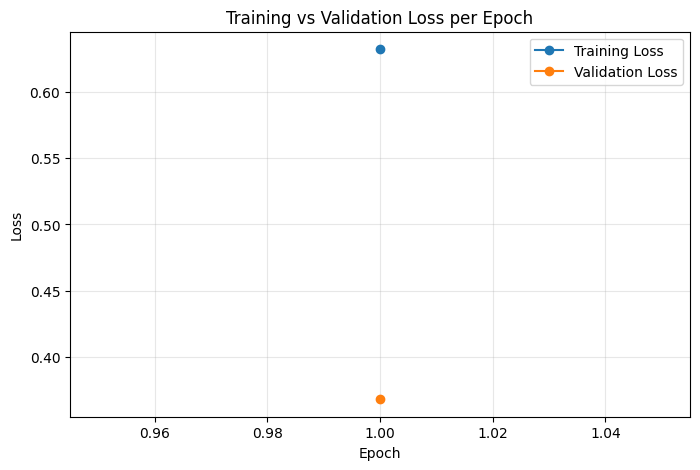

In [ ]:

# import os, json, numpy as np, matplotlib.pyplot as plt, pandas as pd

# run_outdir = "outputs/distilbert-base-uncased_lr2e-05_bs16_ep3_20251126_051700"
# save_path = os.path.join(run_outdir, "loss_epoch_plot.png")

# def load_log_history_from_folder(run_outdir):
#     # look for common log files inside run_outdir
#     candidates = []
#     for root, dirs, files in os.walk(run_outdir):
#         for f in files:
#             fn = f.lower()
#             if fn == "log_history.json" or fn.startswith("trainer_state"):
#                 candidates.append(os.path.join(root, f))
#     # prefer log_history.json
#     cand = None
#     for c in candidates:
#         if os.path.basename(c).lower() == "log_history.json":
#             cand = c; break
#     if cand is None and candidates:
#         cand = candidates[0]
#     if cand is None:
#         return None
#     # load file
#     with open(cand, "r", encoding="utf-8") as fh:
#         txt = fh.read()
#     # try to parse as JSON fully
#     try:
#         obj = json.loads(txt)
#         if isinstance(obj, dict) and "log_history" in obj:
#             logs = obj["log_history"]
#         elif isinstance(obj, list):
#             logs = obj
#         else:
#             # fallback: maybe nested; try to find list-like keys
#             if isinstance(obj, dict):
#                 # some trainer_state files store log_history inside
#                 for k,v in obj.items():
#                     if isinstance(v, list) and len(v)>0 and isinstance(v[0], dict) and "epoch" in v[0]:
#                         logs = v
#                         break
#                 else:
#                     logs = []
#             else:
#                 logs = []
#     except Exception:
#         # per-line JSON fallback
#         logs = []
#         for ln in txt.splitlines():
#             ln = ln.strip()
#             if not ln:
#                 continue
#             try:
#                 j = json.loads(ln)
#                 logs.append(j)
#             except:
#                 continue
#     return logs

# def plot_loss_per_epoch_from_logs_obj(logs, save_path=None, smooth_window=1):
#     if not logs:
#         raise ValueError("Empty logs provided.")
#     df = pd.DataFrame(logs)
#     if 'epoch' not in df.columns:
#         raise ValueError("Logs do not contain 'epoch' entries.")
#     max_epoch = int(np.ceil(df['epoch'].max()))
#     train_by_epoch = []
#     val_by_epoch = []
#     for e in range(1, max_epoch+1):
#         # training: last record with epoch <= e and loss present
#         train_rows = df[(df['epoch'] <= e) & (df.get('loss').notna())]
#         if not train_rows.empty:
#             # sort by epoch then step if present
#             sort_cols = ['epoch', 'step'] if 'step' in train_rows.columns else ['epoch']
#             last_train = train_rows.sort_values(sort_cols).iloc[-1]
#             train_by_epoch.append((e, float(last_train['loss'])))
#         else:
#             train_by_epoch.append((e, np.nan))
#         # val: first prefer exact epoch match, else last <= e
#         val_rows = df[(df['epoch'] >= e-0.0001) & (df['epoch'] <= e+0.0001) & (df.get('eval_loss').notna())]
#         if val_rows.empty:
#             val_rows = df[(df['epoch'] <= e) & (df.get('eval_loss').notna())]
#         if not val_rows.empty:
#             last_val = val_rows.sort_values(['epoch']).iloc[-1]
#             val_by_epoch.append((e, float(last_val['eval_loss'])))
#         else:
#             val_by_epoch.append((e, np.nan))
#     epochs = [t[0] for t in train_by_epoch]
#     train_loss = np.array([t[1] for t in train_by_epoch], dtype=float)
#     val_loss = np.array([t[1] for t in val_by_epoch], dtype=float)
#     def smooth(arr, w):
#         if w <= 1: return arr
#         return pd.Series(arr).rolling(window=w, min_periods=1).mean().to_numpy()
#     train_loss_s = smooth(train_loss, smooth_window)
#     val_loss_s = smooth(val_loss, smooth_window)
#     plt.figure(figsize=(8,5))
#     plt.plot(epochs, train_loss_s, marker='o', label='Training Loss')
#     plt.plot(epochs, val_loss_s, marker='o', label='Validation Loss')
#     plt.xlabel('Epoch'); plt.ylabel('Loss'); plt.title('Training vs Validation Loss per Epoch')
#     plt.legend(); plt.grid(alpha=0.3)
#     if save_path:
#         os.makedirs(os.path.dirname(save_path), exist_ok=True)
#         plt.savefig(save_path, bbox_inches='tight')
#         print("Saved plot to:", save_path)
#     plt.show()

# # MAIN
# logs = load_log_history_from_folder(run_outdir)
# if not logs:
#     # try to use trainer.state.log_history if trainer exists in session
#     if 'trainer' in globals() and hasattr(globals()['trainer'], 'state'):
#         logs = globals()['trainer'].state.log_history
#         print("Using trainer.state.log_history from session.")
#     else:
#         raise FileNotFoundError(f"No log_history found in {run_outdir} and no trainer in session.")
# # Plot and save
# plot_loss_per_epoch_from_logs_obj(logs, save_path=save_path, smooth_window=1)


##Model 2 - BERT Grid Search Tuning

In [ ]:
# # Cell 3: Simple grid-search wrapper
# # This will run a set of hyperparam combos (small grid for debugging).
# # Each trial uses run_training_pipeline() which already saves run folder with formatted name.
# # We also move each run into outputs/gridsearch/ for easier grouping.

# import os
# import itertools
# import pandas as pd
# from src.model_BERT import run_training_pipeline
# from configs.config import MODEL_CONFIGS

# # Grid small for debugging. Teammates can expand/experiment per their liking on their model.
# # grid = {
# #     "learning_rate": [2e-5, 3e-5],
# #     "num_train_epochs": [1, 2],
# #     "train_batch_size": [8, 16]
# # }
# grid = {
#     "learning_rate": [2e-5 ],
#     "num_train_epochs": [4],
#     "train_batch_size": [8]
# }

# model_key = "bert"
# chosen_jsonl = "raw/review_categories/All_Beauty.jsonl"
# subset_sample = 2000  # small subset for speed in debug; set None for full training

# # prepare results list
# results = []

# # folder to keep grid runs grouped
# base_output_root = MODEL_CONFIGS[model_key].get("output_root", "outputs")
# grid_folder = os.path.join(base_output_root, "gridsearch")
# os.makedirs(grid_folder, exist_ok=True)

# # iterate over combinations
# keys, values = zip(*grid.items())
# combos = list(itertools.product(*values))
# print(f"Running {len(combos)} grid trials (debug).")

# for idx, combo in enumerate(combos, start=1):
#     hp = dict(zip(keys, combo))
#     print(f"\n=== Trial {idx}/{len(combos)}: {hp} ===")
#     # map hp keys to config_overrides names expected by run_training_pipeline
#     overrides = {
#         "learning_rate": hp["learning_rate"],
#         "num_train_epochs": hp["num_train_epochs"],
#         "train_batch_size": hp["train_batch_size"],
#         "eval_batch_size": 32
#     }
#     res = run_training_pipeline(
#         repo_id="McAuley-Lab/Amazon-Reviews-2023",
#         chosen_jsonl=chosen_jsonl,
#         model_key=model_key,
#         subset_sample=subset_sample,
#         config_overrides=overrides
#     )
#     run_dir = res["run_outdir"]
#     print("Completed trial. Run dir:", run_dir)

#     # move or copy run folder under outputs/gridsearch to group them (we keep original naming but add index)
#     trial_dest = os.path.join(grid_folder, f"trial_{idx:02d}_" + os.path.basename(run_dir))
#     # use rename (move)
#     try:
#         os.rename(run_dir, trial_dest)
#         print("Moved run folder to:", trial_dest)
#         run_dir = trial_dest
#     except Exception as e:
#         print("Could not move run folder (perhaps across filesystems). Keeping original:", run_dir)

#     # record summary info
#     eval_metrics = res["eval"]["metrics"]
#     results.append({
#         "trial": idx,
#         "run_dir": run_dir,
#         "train_seconds": res["train_seconds"],
#         "accuracy": eval_metrics.get("accuracy"),
#         "f1": eval_metrics.get("f1_macro") or eval_metrics.get("f1_macro"),
#         **hp
#     })

# # save grid summary CSV
# results_df = pd.DataFrame(results)
# csv_path = os.path.join(grid_folder, "grid_search_summary.csv")
# results_df.to_csv(csv_path, index=False)
# print("Grid summary saved to:", csv_path)
# print(results_df)


IndentationError: unindent does not match any outer indentation level (<tokenize>, line 50)

In [ ]:
# Cell 3: Grid-search + evaluation + plots saved per-trial
# Paste as a single cell in your notebook.

import os
import itertools
import json
import glob
import shutil
from datetime import datetime
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import (
    accuracy_score,
    precision_recall_fscore_support,
    classification_report,
    confusion_matrix
)

# project imports (unchanged)
from src.model_BERT import run_training_pipeline
from configs.config import MODEL_CONFIGS

# ----------------- CONFIG (edit grid values as you need) -----------------
grid = {
    "learning_rate": [2e-5],      # add more values to expand search
    "num_train_epochs": [4],
    "train_batch_size": [8]
}

model_key = "bert"
chosen_jsonl = "raw/review_categories/All_Beauty.jsonl"
subset_sample = 2000   # use None for full dataset

# base outputs and grid folder
base_output_root = MODEL_CONFIGS[model_key].get("output_root", "outputs")
grid_root = os.path.join(base_output_root, "gridsearch")
os.makedirs(grid_root, exist_ok=True)

# ----------------- helper functions -----------------
def safe_makedirs(path):
    try:
        os.makedirs(path, exist_ok=True)
    except Exception:
        pass

def find_predictions(run_dir):
    """
    Try common file names to find saved predictions (y_true,y_pred).
    Accepts CSV with columns like label/pred or y_true/y_pred, .npy containing [y_true,y_pred],
    or json/jsonl with records {'label':..,'pred':..}.
    Returns (y_true, y_pred) arrays or (None, None).
    """
    patterns = [
        "predictions.csv", "preds.csv", "eval_predictions.csv",
        "predictions*.csv", "*preds*.csv", "predictions.npy", "preds.npy",
        "predictions.json", "predictions.jsonl", "eval_preds.csv"
    ]
    for pat in patterns:
        for path in glob.glob(os.path.join(run_dir, pat)):
            try:
                if path.endswith(".npy"):
                    arr = np.load(path, allow_pickle=True)
                    if isinstance(arr, (list, tuple)) and len(arr) >= 2:
                        return np.array(arr[0]), np.array(arr[1])
                elif path.endswith(".json") or path.endswith(".jsonl"):
                    # load as list of dicts
                    with open(path, "r", encoding="utf8") as f:
                        if path.endswith(".jsonl"):
                            lines = [json.loads(l) for l in f if l.strip()]
                            data = lines
                        else:
                            data = json.load(f)
                    if isinstance(data, list) and data and isinstance(data[0], dict):
                        true, pred = [], []
                        for rec in data:
                            if "label" in rec and "pred" in rec:
                                true.append(rec["label"]); pred.append(rec["pred"])
                        if true:
                            return np.array(true), np.array(pred)
                    if isinstance(data, dict) and "y_true" in data and "y_pred" in data:
                        return np.array(data["y_true"]), np.array(data["y_pred"])
                else:
                    df = pd.read_csv(path)
                    cols = [c.lower() for c in df.columns]
                    # common names
                    if "label" in cols and "pred" in cols:
                        return df.iloc[:, cols.index("label")].values, df.iloc[:, cols.index("pred")].values
                    for a,b in [("y_true","y_pred"),("true","pred"),("actual","predicted"),("target","prediction")]:
                        if a in cols and b in cols:
                            return df.iloc[:, cols.index(a)].values, df.iloc[:, cols.index(b)].values
                    if df.shape[1] == 2:
                        return df.iloc[:,0].values, df.iloc[:,1].values
            except Exception:
                continue
    return None, None

def find_history(run_dir):
    """
    Try to locate a training history (loss/accuracy per epoch).
    Looks for history.json, metrics.json, training_log.csv, history.csv
    Returns dict like {'train_loss':[], 'val_loss':[], 'train_acc':[], 'val_acc':[]}
    """
    candidates = ["history.json","training_history.json","metrics.json","eval_metrics.json",
                  "training_log.csv","history.csv","training_history.csv","logs/training_log.csv"]
    for c in candidates:
        path = os.path.join(run_dir, c)
        if os.path.exists(path):
            try:
                if path.endswith(".json") or path.endswith(".jsonl"):
                    with open(path,"r",encoding="utf8") as f:
                        data = json.load(f)
                    # common shapes: { 'train_loss': [...], 'val_loss': [...] } or { 'history': {...} }
                    if "history" in data and isinstance(data["history"], dict):
                        return data["history"]
                    # copy any keys that look like loss/acc
                    out = {}
                    for k,v in data.items():
                        lk = k.lower()
                        if any(x in lk for x in ("loss","acc","accuracy")):
                            out[k] = v
                    if out:
                        return out
                else:
                    df = pd.read_csv(path)
                    out = {}
                    for col in df.columns:
                        lc = col.lower()
                        if "loss" in lc:
                            if "val" in lc:
                                out.setdefault("val_loss", df[col].tolist())
                            else:
                                out.setdefault("train_loss", df[col].tolist())
                        if "acc" in lc or "accuracy" in lc:
                            if "val" in lc:
                                out.setdefault("val_acc", df[col].tolist())
                            else:
                                out.setdefault("train_acc", df[col].tolist())
                    if out:
                        return out
            except Exception:
                continue
    return {}

def plot_and_save_loss_acc(history, out_dir):
    """Given history dict, plot and save loss and accuracy PNGs into out_dir."""
    safe_makedirs(out_dir)
    # LOSS
    train_loss = history.get("train_loss") or history.get("loss") or history.get("train_loss_list")
    val_loss = history.get("val_loss") or history.get("eval_loss") or history.get("val_loss_list")
    if train_loss:
        plt.figure()
        plt.plot(train_loss, label="train_loss")
        if val_loss:
            plt.plot(val_loss, label="val_loss")
        plt.xlabel("epoch")
        plt.ylabel("loss")
        plt.title("Loss curve")
        plt.legend()
        p = os.path.join(out_dir, "loss_curve.png")
        plt.savefig(p); plt.close()
        print("Saved loss curve ->", p)
    # ACCURACY
    train_acc = history.get("train_acc") or history.get("train_accuracy") or history.get("accuracy")
    val_acc = history.get("val_acc") or history.get("val_accuracy")
    if train_acc:
        plt.figure()
        plt.plot(train_acc, label="train_acc")
        if val_acc:
            plt.plot(val_acc, label="val_acc")
        plt.xlabel("epoch")
        plt.ylabel("accuracy")
        plt.title("Accuracy curve")
        plt.legend()
        p = os.path.join(out_dir, "accuracy_curve.png")
        plt.savefig(p); plt.close()
        print("Saved accuracy curve ->", p)

def save_classification_and_cm(y_true, y_pred, out_dir):
    """Save classification_report.txt and confusion_matrix.png to out_dir."""
    safe_makedirs(out_dir)
    try:
        report = classification_report(y_true, y_pred, zero_division=0)
        rpt_path = os.path.join(out_dir, "classification_report.txt")
        with open(rpt_path, "w", encoding="utf8") as f:
            f.write(report)
        print("Saved classification report ->", rpt_path)
    except Exception as e:
        print("Could not save classification report:", e)
    try:
        cm = confusion_matrix(y_true, y_pred)
        labels = None
        # small attempt to label axes with unique labels from true/pred
        unique = np.unique(np.concatenate([np.array(y_true), np.array(y_pred)]))
        labels = [str(x) for x in unique]
        plt.figure(figsize=(6,6))
        plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
        plt.colorbar()
        plt.xticks(ticks=np.arange(len(labels)), labels=labels, rotation=45)
        plt.yticks(ticks=np.arange(len(labels)), labels=labels)
        plt.ylabel("True label")
        plt.xlabel("Predicted label")
        plt.title("Confusion matrix")
        # annotate
        thresh = cm.max()/2.0 if cm.size else 0
        for i in range(cm.shape[0]):
            for j in range(cm.shape[1]):
                plt.text(j, i, format(cm[i,j], 'd'),
                         ha="center", va="center",
                         color="white" if cm[i,j] > thresh else "black")
        cm_path = os.path.join(out_dir, "confusion_matrix.png")
        plt.tight_layout()
        plt.savefig(cm_path); plt.close()
        print("Saved confusion matrix ->", cm_path)
    except Exception as e:
        print("Could not draw confusion matrix:", e)

# ----------------- run grid -----------------
keys, values = zip(*grid.items())
combos = list(itertools.product(*values))
print(f"Grid search will run {len(combos)} trials.")

summary_rows = []

for i, combo in enumerate(combos, start=1):
    hp = dict(zip(keys, combo))
    hp_str = "_".join(f"{k}{str(v).replace('.', 'p')}" for k,v in hp.items())  # e.g. learning_rate2e-5 -> learning_rate2e-5 becomes learning_rate2e-5 but '.'->'p'
    timestamp = datetime.now().strftime("%Y%m%d_%H%M%S")
    folder_name = f"{model_key}_{hp_str}_{timestamp}"
    trial_output_dir = os.path.join(grid_root, folder_name)
    safe_makedirs(trial_output_dir)

    print("\n" + "="*60)
    print(f"Trial {i}/{len(combos)} - hyperparams: {hp}")
    print("Output folder will be:", trial_output_dir)

    # prepare overrides for training pipeline
    overrides = {
        "learning_rate": hp["learning_rate"],
        "num_train_epochs": hp["num_train_epochs"],
        "train_batch_size": hp["train_batch_size"],
        "eval_batch_size": 32
    }

    # call your pipeline (it should create a run folder and return info in res)
    res = run_training_pipeline(
        repo_id="McAuley-Lab/Amazon-Reviews-2023",
        chosen_jsonl=chosen_jsonl,
        model_key=model_key,
        subset_sample=subset_sample,
        config_overrides=overrides
    )

    # extract returned run_dir (many pipelines use "run_outdir" name)
    run_dir = res.get("run_outdir") or res.get("run_dir") or res.get("output_dir") or res.get("out_dir")
    if not run_dir:
        # fallback: sometimes pipeline returns a path inside res['run_name'] or similar; try to find most recent subfolder in base output
        base_candidate = MODEL_CONFIGS[model_key].get("output_root", "outputs")
        try:
            subdirs = sorted([os.path.join(base_candidate,d) for d in os.listdir(base_candidate)], key=os.path.getmtime, reverse=True)
            run_dir = subdirs[0] if subdirs else None
        except Exception:
            run_dir = None

    print("Pipeline reported run_dir:", run_dir)

    # move (or copy) the produced run folder into our trial_output_dir so everything is grouped
    # final_run_dest should be trial_output_dir/run_basename (keeps original run naming)
    if run_dir and os.path.exists(run_dir):
        run_basename = os.path.basename(run_dir.rstrip("/"))
        final_run_dest = os.path.join(trial_output_dir, run_basename)
        try:
            os.rename(run_dir, final_run_dest)
            print("Moved pipeline run folder to:", final_run_dest)
            run_dir = final_run_dest
        except Exception:
            try:
                shutil.copytree(run_dir, final_run_dest)
                print("Copied pipeline run folder to:", final_run_dest)
                run_dir = final_run_dest
            except Exception as e:
                print("Could not move/copy run folder. Keeping original location:", run_dir)
    else:
        print("Warning: pipeline did not produce or return a run folder we could find. We will still save available metrics into the trial folder.")
        final_run_dest = trial_output_dir
        run_dir = None

    # collect metrics from res if present
    eval_metrics = {}
    if isinstance(res.get("eval"), dict):
        eval_metrics = res["eval"].get("metrics", {}) or res["eval"]

    # try to find predictions inside the run dir and compute metrics if needed
    y_true, y_pred = (None, None)
    if run_dir:
        y_true, y_pred = find_predictions(run_dir)

    # if predictions are returned inside res (common), use them
    if y_true is None and isinstance(res.get("eval"), dict):
        preds = res["eval"].get("predictions")
        if preds is not None:
            try:
                if isinstance(preds, (list, tuple)) and len(preds) >= 2:
                    y_true = np.array(preds[0]); y_pred = np.array(preds[1])
                elif isinstance(preds, dict) and "y_true" in preds and "y_pred" in preds:
                    y_true = np.array(preds["y_true"]); y_pred = np.array(preds["y_pred"])
            except Exception:
                y_true, y_pred = None, None

    # recompute standard metrics if we have predictions
    if y_true is not None and y_pred is not None:
        try:
            acc = float(accuracy_score(y_true, y_pred))
            prec_macro, rec_macro, f1_macro, _ = precision_recall_fscore_support(y_true, y_pred, average="macro", zero_division=0)
            # attach into eval_metrics
            eval_metrics.setdefault("accuracy", acc)
            eval_metrics.setdefault("precision_macro", float(prec_macro))
            eval_metrics.setdefault("recall_macro", float(rec_macro))
            eval_metrics.setdefault("f1_macro", float(f1_macro))
            print("Recomputed metrics from predictions: accuracy={:.4f}, f1_macro={:.4f}".format(acc, f1_macro))
            # save classification report + confusion matrix into trial folder
            save_classification_and_cm(y_true, y_pred, trial_output_dir)
            # also save raw preds CSV for record
            try:
                preds_df = pd.DataFrame({"y_true": list(y_true), "y_pred": list(y_pred)})
                preds_csv = os.path.join(trial_output_dir, "predictions_saved_by_gridsearch.csv")
                preds_df.to_csv(preds_csv, index=False)
                print("Saved copy of predictions ->", preds_csv)
            except Exception:
                pass
        except Exception as e:
            print("Could not compute metrics from predictions:", e)
    else:
        print("No predictions found for this run. If you want automatic recompute, make run_training_pipeline() save predictions as 'predictions.csv' or similar.")

    # find training history and draw loss/acc curves if possible
    history = {}
    if run_dir:
        history = find_history(run_dir) or find_history(trial_output_dir)
    if history:
        plot_and_save_loss_acc(history, trial_output_dir)
    else:
        print("No training history found in run folder. To produce loss/accuracy curves, save 'history.json' or 'training_log.csv' from training.")

    # print and save the eval_metrics (if any) into trial folder as json
    if eval_metrics:
        print("Evaluation metrics for trial:", json.dumps(eval_metrics, indent=2) if isinstance(eval_metrics, dict) else eval_metrics)
        try:
            with open(os.path.join(trial_output_dir, "eval_metrics.json"), "w", encoding="utf8") as f:
                json.dump(eval_metrics, f, indent=2)
            print("Saved eval_metrics.json ->", os.path.join(trial_output_dir, "eval_metrics.json"))
        except Exception:
            pass
    else:
        print("No evaluation metrics were returned by pipeline (res['eval'] empty).")

    # record a summary row
    summary_rows.append({
        "trial_index": i,
        "trial_folder": trial_output_dir,
        "model_key": model_key,
        **hp,
        "accuracy": eval_metrics.get("accuracy") if isinstance(eval_metrics, dict) else None,
        "f1_macro": eval_metrics.get("f1_macro") if isinstance(eval_metrics, dict) else None,
        "train_seconds": res.get("train_seconds") or res.get("train_time_seconds") or None
    })

# save CSV summary
summary_df = pd.DataFrame(summary_rows)
summary_csv = os.path.join(grid_root, "grid_search_summary.csv")
summary_df.to_csv(summary_csv, index=False)
print("\nGrid search finished. Summary saved to:", summary_csv)
print(summary_df)


⚙️  Running in WANDB offline mode
Grid search will run 1 trials.

Trial 1/1 - hyperparams: {'learning_rate': 2e-05, 'num_train_epochs': 4, 'train_batch_size': 8}
Output folder will be: outputs/gridsearch/bert_learning_rate2e-05_num_train_epochs4_train_batch_size8_20251126_072255


/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


raw/review_categories/All_Beauty.jsonl:   0%|          | 0.00/327M [00:00<?, ?B/s]

Downloaded to: /root/.cache/huggingface/hub/datasets--McAuley-Lab--Amazon-Reviews-2023/snapshots/2b6d039ed471f2ba5fd2acb718bf33b0a7e5598e/raw/review_categories/All_Beauty.jsonl


Generating train split: 0 examples [00:00, ? examples/s]

Loaded dataset rows: 701528
Columns: ['rating', 'title', 'text', 'images', 'asin', 'parent_asin', 'user_id', 'timestamp', 'helpful_vote', 'verified_purchase']


Map:   0%|          | 0/701528 [00:00<?, ? examples/s]

After preprocess sample: {'rating': 5.0, 'text': "Such a lovely scent but not overpowering. — This spray is really nice. It smells really good, goes on really fine, and does the trick. I will say it feels like you need a lot of it though to get the texture I want. I have a lot of hair, medium thickness. I am comparing to other brands with yucky chemicals so I'm gonna stick with this. Try it!", 'label3': 2, 'label5': 4}


Filter:   0%|          | 0/701528 [00:00<?, ? examples/s]

Num rows after filter: 701528


Casting the dataset:   0%|          | 0/701528 [00:00<?, ? examples/s]

Sizes: 561229 70146 70153
Before oversample class counts:
 label3
2    400090
0    116093
1     45046
Name: count, dtype: int64
After oversample class counts:
 label3
2    400090
0    400090
1    400090
Name: count, dtype: int64
Using subset of train: 2000


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/483 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

Map:   0%|          | 0/2000 [00:00<?, ? examples/s]

Map:   0%|          | 0/70146 [00:00<?, ? examples/s]

Map:   0%|          | 0/70153 [00:00<?, ? examples/s]

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Using the `WANDB_DISABLED` environment variable is deprecated and will be removed in v5. Use the --report_to flag to control the integrations used for logging result (for instance --report_to none).
/content/drive/My Drive/ColabNotebooks/DL/Deep Learning Project Full/DL Team Project - Code, Files, Structure/src/model_BERT.py:175: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  trainer = Trainer(


Run outputs will be saved in: outputs/distilbert-base-uncased_lr2e-05_bs8_ep4_20251126_072948
Starting training...


Epoch,Training Loss,Validation Loss


ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/IPython/core/interactiveshell.py", line 3553, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "/tmp/ipython-input-15-2928461608.py", line 246, in <cell line: 0>
    res = run_training_pipeline(
          ^^^^^^^^^^^^^^^^^^^^^^
  File "/content/drive/My Drive/ColabNotebooks/DL/Deep Learning Project Full/DL Team Project - Code, Files, Structure/src/model_BERT.py", line 197, in run_training_pipeline
    train_res = trainer_train_with_timing(trainer)
                ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/content/drive/My Drive/ColabNotebooks/DL/Deep Learning Project Full/DL Team Project - Code, Files, Structure/src/utils.py", line 161, in trainer_train_with_timing
    train_output = trainer.train(*train_args, **train_kwargs)
                   ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/transformers/trainer.py", line 2325, in train


TypeError: object of type 'NoneType' has no len()